## The knapsack problem: dynamic programming solution

Given integers $(w_1, v_1), \dots, (w_m, v_m)$ and C.  

A set $S \subseteq \{1, \dots ,m\}$ such that $\sum_{i \in S} w_i \le C$ and $\sum_{i \in S} v_i$ is maximal.

---

__Knapsack is NP-complete: reduction from the set splitting problem.__

Given integers $a_1, \dots, a_m$

Is there a subset $S \subseteq \{1, \dots, m\}$ such that $\sum_{i \in S} a_i = \sum_{i \notin S} a_i$

(pos. int.,list of pos. ints.) $\to$ list of ints.

There exists a reduction that does this by appending one integer to the input list.

```
def reduction(K, list_of_pos_ints):
    """K is a pos integer"""

    # code goes here
    new_int = sum(list_of_pos_ints) - 2*K  #edit this value

    list_of_pos_ints.append(new_int)
    return list_of_pos_ints

```

What if integers $a_1, \dots, a_m$ are all positive.

There exists a reduction that does this by appending one __positive__ integer to the input list.

```
def reduction(K, list_of_pos_ints):
    """K is a pos integer"""

    # code goes here
    s = sum(list_of_pos_ints)
    if 2*K > s:
        new_int = 2*K - s  #edit this value
    elif 2*K < s:
        new_int = s - 2*K
    else:
        new_int = K

    list_of_pos_ints.append(new_int)
    return list_of_pos_ints
```

---

Let $T=\sum_{i \le m} v_i$. Solvable in time polynomial in T and m.

Does this imply P=NP? No, becasue T can be exponential of input.

---

Build a table. Cell (i,j) contains the minimal weight of a knapsack with value exactly $j$ consisting of only objects $\{1, \dots, i\}$

$W(i,j)$ is the minimal weight of a knapsack with value exactly $j$ consisting of only objects $\{1,\dots,i\}$.

$W(i,j) = min\{W(i-1, j), W(i-1, j-v_i)+w_i\}$ (when filling each cell, we only need to look up two cells in the  previous row)

| objects | A | B | C | D | E |
|--|--|--|--|--|--|
| weight | 3 | 2 | 2 | 2 | 3 |
| value | 2 | 5 | 3 | 1 | 5 |

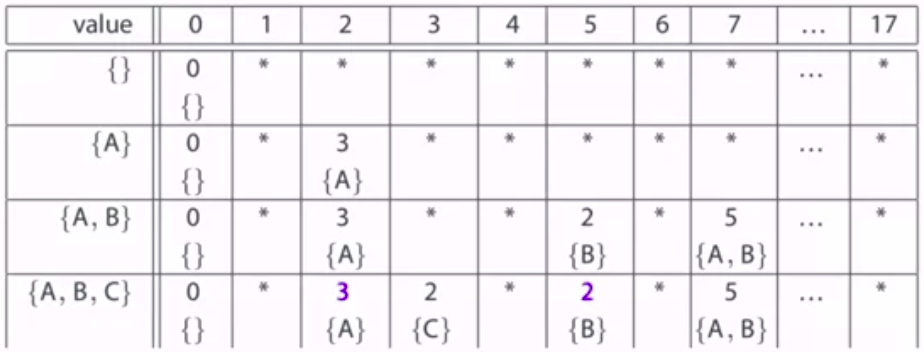

Time to fill a cell, is the time to look up two cells in the  previous row. It's a constant.  

Time to fill the table is proportional to the size of the table, which is $m \times T$, the sum of all values $T=\sum_{i \le m} v_i$

## The knapsack problem: approximation scheme

- Remove all elements $i$ with $w_i > C$, they will never belong to a valid knapsack. So the remaining objects $w_i \le C$.

- Let $v_{max} = max{v_1, \dots, v_m}$. We choose $s$ later, run the algorithm on input, we get

$(w_1, floor(s \frac{v_1}{v_{max}})), \dots, (w_m, floor(s \frac{v_m}{v_{max}}))$

The result is a new knapsack problem. We appy the knapsack algorithm on this new set. The table size is reduced, and it's in polynomial time.

The best bound of the size of the table is $O(m^2 s)$, there are $m+1$ rows, and $m$ reduced value $s \implies m^2 s$

---

We need to bound

$\sum_{i \in S_{opt}} v_i - \sum_{i \in S_{app}} v_i$

$S_{app}$ = approximately optimal knapsack

$S_{opt}$ = an optimal knapsack

$\sum_{i \in S_{opt}} floor(s \frac{v_i}{v_{max}}) \le \sum_{i \in S_{app}} floor(s \frac{v_i}{v_{max}})$

$\implies \sum_{i \in S_{opt}} (s \frac{v_i}{v_{max}} - 1) \le \sum_{i \in S_{app}} s \frac{v_i}{v_{max}}$

$\implies \sum_{i \in S_{opt}} (v_i -  \frac{v_{max}}{s}) \le \sum_{i \in S_{app}} v_i$

Let $TV(S) = \sum_{i\in S} v_i$

$TV(S_{opt}) - TV(S_{app}) \le v_{max} m /s$

Recall $TV(S_{opt}) \ge v_{max}$, Thus

$\frac{TV(S_{opt}) - TV(S_{app})}{TV(S_{opt})} \le \frac{v_{max} m /s}{v_{max}} = m/s$

Now let's pick $s$. 

For each $\rho < 1$, select $s=m/(1-\rho)$, so $s$ is bounded by poly of input.

We obtain a polynomial time $\rho$-approximation.

$O(m^2 s) = O(\frac{1}{1-\rho} m^3)$

## A PTAS for the Makespan problem

A _Polynomial time approximation scheme_ or PTAS for a maximization problems is a collection of algorithm $A_{\rho}$ such that for each $\rho < 1$, the running time is polynomial in the input length and $A_{\rho}$ is a $\rho$-approximation algorithm.  
Similar for minimization problems. ($\rho> 1$)


Minimize makespan:

Distribute task on 3 CPUs, so that the max running of any CPU is minimal. (In shortest possible time, all the tasks are finished)

Given integer $k$ and rational numbers $t_1, \dots, t_m$

Partition the rational numbers in $k$ sets $S_1, \dots, S_k$ such that 

$max_{i \le k} \{ \sum_{j\in S_i} t_j \}$ is minimal.

---

Consider the special case $k=2$ and reduce from set splitting.

Integers $a_1, \dots, a_m$  
Is there a subset $S\subseteq \{1, \dots ,m\}$ such that $\sum_{i\in S} a_i = \sum_{i \notin S} a_i$

---

__PTAS for makespan__

We present the case for $k=2$. The general case is similar.

- Normalize the values $t_i$ such that $t_1 + \dots + t_m = 2$
- Let $\varepsilon$ such that $\rho = 1+\varepsilon$
- Split the tasks $t_1 + \dots + t_m$ into a set of large tasks and a set of small tasks.

$T_{large}=[t_i : t_i > \varepsilon]$ and $T_{small}=[t_i : t_i \le \varepsilon]$

> Compute optimal allocation for $T_{large}$ by exhaustive search. Then allocate $T_{small}$ in a greedy way.

Exhaustive search takes $O(2^{2/\varepsilon})$

Sum of all is 2, so at most $2/\varepsilon$ items can take value more than $\varepsilon$. Let number of $T_{large}$ be $x \implies x \times \varepsilon \le 2 \implies x \le 2/\varepsilon$

For general case, $O(k^{k/\varepsilon})$

Greedy algorithm takes $O(m)$

Hence the running time satisfies PTAS requirements: after fixing $\varepsilon$ its polynomial time

---

__Proof of correctness__

Consider the last task of the slowest process.

Case 1. it is a task in $T_{large}$, thus the solution is optimal. (all task is $> \varepsilon$, all is done by exhaustive search)

Case 2. it is a task in $T_{small}$.  
Then the loads differ by at most $\varepsilon$. (Greedy algorithm).  
Thus the maximal load is at most $1+\varepsilon$.  
The optimal load is at least 1.

We have a $1+\varepsilon = \rho$ approximation

But it depends on $\varepsilon$ is very bad.

## FPTAS

A maximization problem has a _fully_ polynomial time approximation scheme or FPTAS if ther exists an algorithm that on input $\varepsilon > 0$ produces in polynomial time a solution of quality at least $1-\varepsilon$ times the maximal quality.  
Similar for minimization problem. ($1+\varepsilon$)

- Our algorithm for knapsack is FPTAS: time $O(\frac{1}{1-\rho}m^3)$
- Our algorithm for makespan is a PTAS, but not an FPTAS, becasue of factor $k^{1/\varepsilon}$
- Makespan has a FPTAS, but it is very comlicated.
- If the independent set problem has a FPTAS, then P=NP. Indeed, setting $\varepsilon < 1/n$ would give an optimal solution in poly time. (we can set $\varepsilon$ to any value, set it to $1/n$. So the running time would have a $n/n$, which would be a poly-time solution. And $1+\varepsilon < 1 + 1/n$ must produce the exact answser. So ind. set will become poly-time solvable.)

## Greedy makespan algorithm

The input is the number $k$ of operators and a list of tasks of lengths $t_1, t_2, \ldots, t_m$. For increasing $i = 1,2,\ldots, m$, it assigns each task $t_i$ to an operator with smallest workload.

Assume $P \not= NP$.

- Consider the greedy makespan problem. Assume that for some $s$, the allocation of tasks $t_1, \ldots, t_s$ has the minimal makespan among all allocations of $t_1, \ldots, t_s$. Then the resulting makespan is at most

$OPT+\frac{k−1}{k} max\{t_{s+1},…,t_m\}$

where OPT is the minimal makespan.

- There exists a constant $\rho$ such that the greedy makespan algorithm is a $\rho$-approximation

- The following variant of the knapsack problem is NP-complete:

   Input: integers $C$ and $V$, and a list of pairs of positive integers $(w_1, v_1), \ldots, (w_m, v_m)$.  
   Question: What is the maximal total value of a knapsack with total weight at least $C$.
   
- At most $2k$ tasks in a makespan input have length $t_i > \text{OPT}/3$, where OPT is the minimal makespan.

- Suppose that in the makespan problem the lengths are ordered non-increasingly, i.e., $t_1 \ge t_2 \ge \ldots \ge t_m$. If $m \le 2k$, then the greedy makespan algorithm computes an optimal allocation.

---

Consider the following algorithm, called  sorted greedy makespan algorithm. On input $k$ and a list $t_1, \ldots,  t_m$, it sorts the lengths of the tasks non-increasingly and applies the greedy makespan algorithm. We can combine 3 true statements in the above list to prove that this algorithm is a ($\rho$)-approximation for some $\rho > 1$. What is the smallest $\rho$ that you get as a function of $k$? 

$OPT+\frac{k−1}{k} max\{t_{s+1},…,t_m\}$, and $max\{t_{s+1},…,t_m\} \le \text{OPT}/3$

$\implies (\text{OPT} + \frac{k−1}{k} \times \text{OPT}/3) / \text{OPT} = 1+\frac{k−1}{3k} = \frac{4k-1}{3k}$

---

The bound in the previous exercise is the best possible bound for all $k$. Prove this for $k=2$. 

More precisely, for $\rho$ equal to the value above with $k=2$, give an a list of tasks where the ratio of the span generated by the sorted greedy algorithm and the minimal span is exactly equal to $\rho$.

This task should be a list of rational numbers that is no longer than 12.

```
# modify this value
tasks = [3]*2 + [2]*3

assert len(tasks) <= 12

# the grader will use this function
def sortedGreedy(tasks):
    """tasks is a list of reals or integers"""
    tasks = sorted(tasks)
    op1 = []
    op2 = []
    for task in tasks :
        if sum(op1) > sum(op2) :
            op2.append(task)
        else :
            op1.append(task)
    return max(sum(op1), sum(op2))
```